# Módulo 2 Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución.
**Entregable:** Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución.

1. Crea un repositorio de GitHub para este proyecto. ✓
2. Programa uno de los algoritmos vistos en el módulo (o que tu profesor de módulo autorice) haciendo uso de una biblioteca o framework de aprendizaje máquina. Lo que se busca es que demuestres tu conocimiento sobre el framework y como configurar el algoritmo. ✓
3. Prueba tu implementación con un set de datos y realiza algunas predicciones. Las predicciones las puedes correr en consola o las puedes implementar con una interfaz gráfica apoyándote en los visto en otros módulos.  (https://www.kaggle.com/datasets/akram24/social-network-ads) ✓
4. Tu implementación debe de poder correr por separado solamente con un compilador, no debe de depender de un IDE o de un “notebook”. Por ejemplo, si programas en Python, tu implementación final se espera que esté en un archivo .py no en un Jupyter Notebook. 
5. Después de la entrega intermedia se te darán correcciones que puedes incluir en tu entrega final. 

---

In [10]:
# Importar librerías necesarias para el modelo de regresión logística
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


In [11]:
# Importar datos desde data.csv
data = pd.read_csv('data.csv')

# Quitar la columna 'User ID' ya que no es relevante para el modelo
data = data.drop(['User ID'], axis=1)

# Convertir la columna 'Gender' a valores numéricos usando get_dummies
data = pd.get_dummies(data, columns = ['Gender'])

# Definir como la variable dependiente a la columna 'Purchased'
Y = data['Purchased']

# Definir como variables independientes el resto de las columnas
X = data.drop(['Purchased'], axis=1)

# Mostrar las primeras 5 filas de los datos
print(data.head())

   Age  EstimatedSalary  Purchased  Gender_Female  Gender_Male
0   19            19000          0              0            1
1   35            20000          0              0            1
2   26            43000          0              1            0
3   27            57000          0              1            0
4   19            76000          0              0            1


# Evaluación del Sesgo y la Varianza

In [12]:
# Separar los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
model = LogisticRegression()
model.fit(X_train, Y_train)

# Predecir en los conjuntos de entrenamiento y validación
train_predictions = model.predict(X_train)
valid_predictions = model.predict(X_valid)

# Calcular las métricas de desempeño
train_accuracy = accuracy_score(Y_train, train_predictions)
valid_accuracy = accuracy_score(Y_valid, valid_predictions)

print(f"Entrenamiento Accuracy: {train_accuracy:.4f}")
print(f"Validación Accuracy: {valid_accuracy:.4f}")

# Evaluar sesgo y varianza
if abs(train_accuracy - valid_accuracy) > 0.1:
    print("Alta varianza (overfitting)")
elif train_accuracy < 0.7 and valid_accuracy < 0.7:
    print("Alto sesgo (underfitting)")
else:
    print("Buen ajuste (modelo balanceado)")

Entrenamiento Accuracy: 0.6571
Validación Accuracy: 0.6167
Alto sesgo (underfitting)


# Diagnóstico del Ajuste del Modelo (Underfitting/Overfitting)

In [13]:
# Diagnóstico del ajuste del modelo
if train_accuracy > 0.85 and valid_accuracy < 0.75:
    print("El modelo está sobreajustado (overfitting)")
elif train_accuracy < 0.6 and valid_accuracy < 0.6:
    print("El modelo está subajustado (underfitting)")
else:
    print("El modelo tiene un buen ajuste")

El modelo tiene un buen ajuste


In [14]:
# Implementar Ridge con búsqueda de mejores parámetros
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

# Definir un rango de hiperparámetros
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Usar GridSearchCV para encontrar el mejor valor de alpha
grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, Y_train)

# Obtener el mejor modelo
best_ridge = grid.best_estimator_

# Hacer predicciones en el conjunto de validación (predicciones continuas)
ridge_valid_predictions = best_ridge.predict(X_valid)

# Convertir predicciones continuas en clases binarias (0 o 1)
ridge_valid_predictions_binary = (ridge_valid_predictions > 0.5).astype(int)

# Calcular accuracy con predicciones binarias
ridge_accuracy = accuracy_score(Y_valid, ridge_valid_predictions_binary)

print(f"Accuracy después de regularización (validación): {ridge_accuracy:.4f}")

Accuracy después de regularización (validación): 0.8500


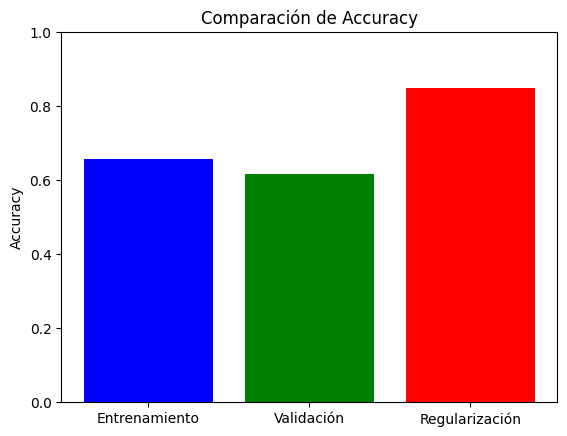

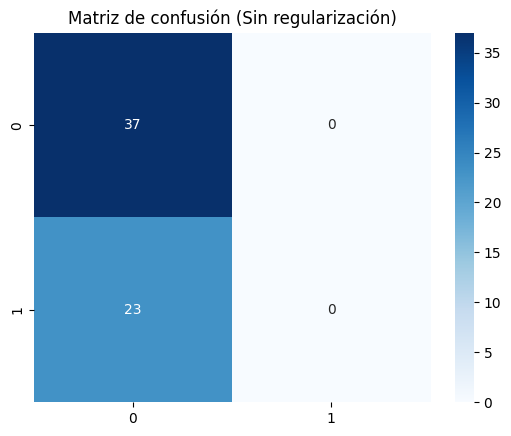

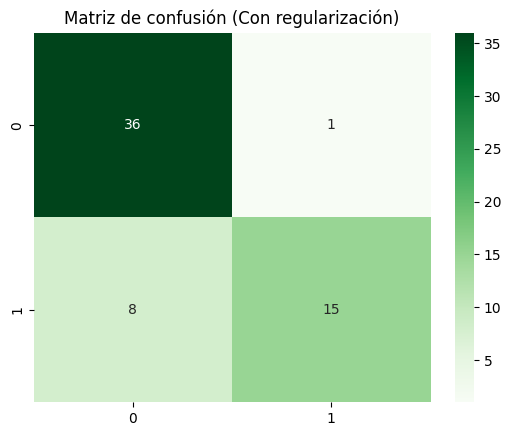

In [15]:
# Comparación de Accuracy
accuracies = [train_accuracy, valid_accuracy, ridge_accuracy]
labels = ['Entrenamiento', 'Validación', 'Regularización']

plt.bar(labels, accuracies, color=['blue', 'green', 'red'])
plt.ylim([0, 1])
plt.title('Comparación de Accuracy')
plt.ylabel('Accuracy')
plt.show()

# Matriz de confusión para el modelo sin regularización
conf_matrix = confusion_matrix(Y_valid, valid_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de confusión (Sin regularización)')
plt.show()

# Matriz de confusión para el modelo con regularización
ridge_conf_matrix = confusion_matrix(Y_valid, (ridge_valid_predictions > 0.5).astype(int))
sns.heatmap(ridge_conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.title('Matriz de confusión (Con regularización)')
plt.show()


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Definir el modelo de Regresión Logística
log_reg = LogisticRegression(solver='liblinear')

# Definir los hiperparámetros para la regularización
# 'penalty': 'l2' para Ridge o 'l1' para Lasso
param_grid = {
    'penalty': ['l1', 'l2'],   # Prueba Lasso (L1) y Ridge (L2)
    'C': [0.1, 1.0, 10.0],     # Valores de C para ajustar el nivel de regularización
}

# Utilizar GridSearchCV para encontrar la mejor combinación de hiperparámetros
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)

# Obtener el mejor modelo con regularización aplicada
best_log_reg = grid.best_estimator_

# Predecir en el conjunto de validación
log_reg_valid_predictions = best_log_reg.predict(X_valid)

# Calcular el accuracy en el conjunto de validación
log_reg_accuracy = accuracy_score(Y_valid, log_reg_valid_predictions)

print(f"Accuracy después de regularización (validación): {log_reg_accuracy:.4f}")

# Mostrar el mejor modelo y sus parámetros
print("Mejor modelo:", best_log_reg)

# Emplear el mejor modelo en el conjunto de prueba
test_predictions = best_log_reg.predict(X_test)

# Calcular el accuracy en el conjunto de prueba
test_accuracy = accuracy_score(Y_test, test_predictions)

print(f"Accuracy en el conjunto de prueba: {test_accuracy:.4f}")

Accuracy después de regularización (validación): 0.8667
Mejor modelo: LogisticRegression(C=10.0, penalty='l1', solver='liblinear')
Accuracy en el conjunto de prueba: 0.8500
